<a href="https://colab.research.google.com/github/alxsanz/curso_data/blob/main/Tarea_N%C2%B01_y_N%C2%B02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando librerias necesarias y datos

In [ ]:
#Importación de librerias necesarias para la carga
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Importación de data set en una variable llamada "df" (puede ser cualquier nombre de variable que contenga el data set)
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/all_months.csv')

## Diccionario



Las columnas del dataset tienen el siguiente significado:


index: Representa el índice de la fila dentro del dataset. Es una columna numérica que identifica cada registro de forma única.


Order ID: Es un identificador único para cada pedido realizado. Este código permite rastrear cada transacción individualmente.


Product: Indica el nombre del producto que fue comprado en la orden.


Quantity Ordered: Muestra la cantidad de unidades del producto específico que se ordenaron en ese pedido.


Price Each: Representa el precio unitario de cada producto. Es el costo de un solo artículo del producto en cuestión.


Order Date: Especifica la fecha y hora exacta en la que se realizó el pedido.


Purchase Address: Contiene la dirección completa del cliente que realizó la compra, incluyendo la calle, ciudad, estado y código postal.

## Contexto y objetivo

El contexto se centra en un escenario de negocio real, específicamente en el análisis de datos de ventas de una empresa.

Los objetivos de este análisis son:

Entender el rendimiento de ventas de la empresa: Identificar patrones en las ventas a lo largo del tiempo (mensual, horaria), determinar los mejores meses y horarios para las ventas.


Optimizar estrategias de negocio: Descubrir qué productos son los más vendidos, cuáles se venden juntos, y cómo el precio afecta las ventas. Esta información puede ser utilizada para tomar decisiones sobre inventario, marketing y estrategias de precios.


Mejorar la toma de decisiones basada en datos: En lugar de basarse en intuiciones, el proyecto busca demostrar cómo las decisiones empresariales pueden ser informadas y respaldadas por el análisis de datos.


Aprender habilidades prácticas de Pandas: Se busca utilizar funciones específicas de Pandas para manipular, analizar y visualizar datos de manera eficiente.

## Eliminando filas nulas (NAN)

In [ ]:
# Verificar la cantidad de valores nulos por columna
df.isnull().sum()

,0
Order ID,545
Product,545
Quantity Ordered,545
Price Each,545
Order Date,545
Purchase Address,545


In [ ]:
# Verificar duplicados
df.duplicated().sum()

1162

**Eliminar Filas o Columnas con Valores Nulos**

In [ ]:
# Eliminar filas con valores nulos
df.dropna(inplace=True)

# Eliminar columnas con valores nulos
df.dropna(axis=1, inplace=True)

**Imputar Valores Nulos**

In [ ]:
# Rellenar valores nulos con un valor específico (por ejemplo, 0)
df.fillna(0, inplace=True)


**Eliminar Duplicados**

In [ ]:
# Eliminar filas duplicadas
df.drop_duplicates(inplace=True)


# Exploración y visualización (EDA): conociendo el data set

In [ ]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [ ]:
df.tail() # Este no es relevante en este caso

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


In [ ]:
df.shape # Cant de filas y columnas

(185687, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185687 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185687 non-null  object
 1   Product           185687 non-null  object
 2   Quantity Ordered  185687 non-null  object
 3   Price Each        185687 non-null  object
 4   Order Date        185687 non-null  object
 5   Purchase Address  185687 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [ ]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

## Exploración estadistica de variables numericas

Exploracion numerica

In [ ]:
df.describe() # No es muy util en este caso ya que los datos son tipo 'objet'

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,185687,185687,185687,185687,185687,185687
unique,178438,20,10,24,142396,140788
top,160873,USB-C Charging Cable,1,11.95,12/15/19 20:16,"193 Forest St, San Francisco, CA 94016"
freq,5,21859,168291,21859,8,9


In [ ]:
df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce') # Aqui se convierte
# la columna para ser leida en formato numerico
# errors='coerce': Esto establece cualquier análisis no válido como NaN (no es un número),
# lo que permite conservar el resto de sus datos y eliminar o imputar los valores faltantes más adelante.

In [ ]:
df['Price Each'].describe() # Valores estadisticos de todos los precios en dolares

,Price Each
count,185686.000000
mean,184.519255
std,332.843838
min,2.990000
25%,11.950000
50%,14.950000
75%,150.000000
max,1700.000000


Exploración visual univariado

<Axes: >

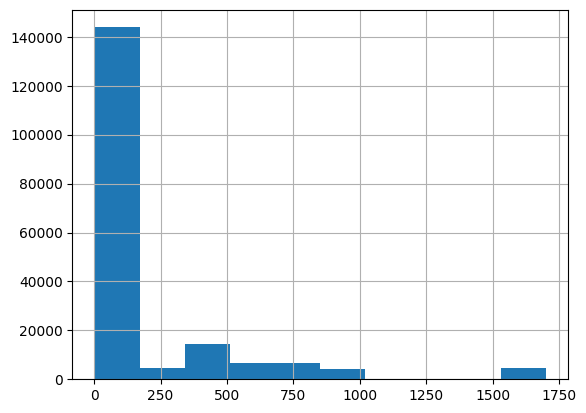

In [ ]:
df['Price Each'].hist() # distribución de la variable


Este histograma me da una clara idea de los precios mas habituales de todos los productos

<Axes: xlabel='Price Each'>

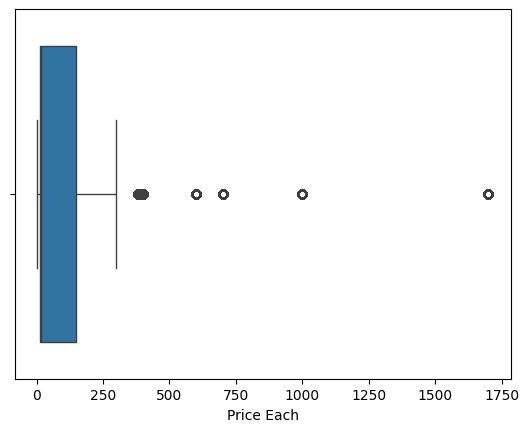

In [ ]:
sns.boxplot(x=df['Price Each']) #identificación de outliers


Diagrama de caja útil para visualizar la tendencia central de precios y los valores atípicos, es de mayor utilidad cuando se desea comparar diferentes distribuciones en varias categorias, no es este el caso.

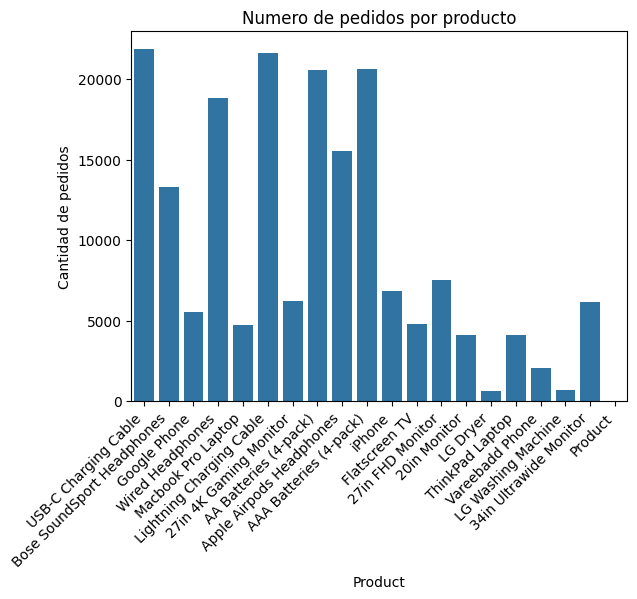

In [ ]:
sns.countplot(x='Product', data=df)
plt.title('Numero de pedidos por producto')
plt.ylabel('Cantidad de pedidos')
plt.xticks(rotation=45, ha='right') # Rotar etiquetas para facilitar su lectura
plt.show()

Esto muestra cuántos pedidos se realizaron para cada producto, lo que revela los más populares.

# Agregando columna de mes, ciudad y ventas

Columna mes

In [ ]:
# Identificando columnas donde 'Order Date' es 'Order Date'
invalid_rows = df[df['Order Date'] == 'Order Date']

# Borrando columnas invalidas
df = df.drop(invalid_rows.index)

# Cre columna mes
df['Month'] = df['Order Date'].str[0:2]

# Columna mes como un 'int'
df['Month'] = df['Month'].astype('int32')

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


Columna ciudad

In [ ]:
def get_city(address): # Toma el nombre de la ciudad
    return address.split(",")[1].strip(" ")
# strip(" ") elimina cualquier espacio inicial o final del nombre de la ciudad y devuelve el nombre de la ciudad
def get_state(address): # Toma el codigo postal
    return address.split(",")[2].split(" ")[1]

# Creando la columna ciudad, la funcion lambda inserta los valores en c/ fila
df['City'] = df['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


Columna de ventas

In [ ]:
df['Sales'] = df['Quantity Ordered'].astype('int') * df['Price Each'].astype('float')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99


# Mejor mes de ventas y ciudad con mas ventas

## Sumando las ventas de cada mes para cuando se vendió más

In [ ]:
df.groupby('Month').sum()['Sales']

,Sales
Month,
1,1821413.16
2,2200078.08
3,2804973.35
4,3389217.98
5,3150616.23
6,2576280.15
7,2646461.32
8,2241083.37
9,2094465.69


range(1, 13)


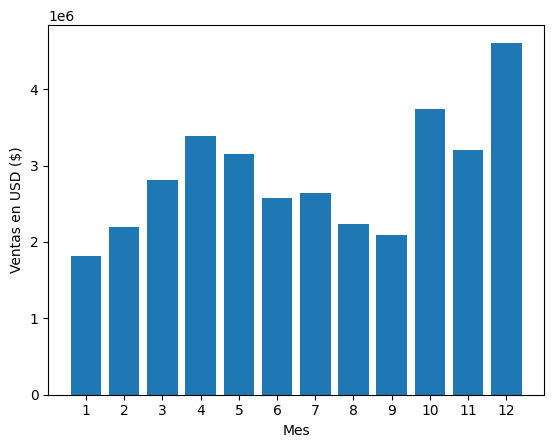

In [ ]:
months = range(1,13)
print(months)

plt.bar(months,df.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Ventas en USD ($)')
plt.xlabel('Mes')
plt.show()


Diciembre fue el mes de mayor numero de ventas

## Ciudad con mayor numero de ventas

In [ ]:
resultado =  df.groupby('City').sum()['Sales']
resultado

,Sales
City,
Atlanta (GA),2794199.07
Austin (TX),1818044.33
Boston (MA),3658627.65
Dallas (TX),2765373.96
Los Angeles (CA),5448304.28
New York City (NY),4661867.14
Portland (ME),449321.38
Portland (OR),1870010.56
San Francisco (CA),8254743.55


San Francisco fue donde mas productos se vendió

# Determinando la mejor hora para publicitar los productos

Creando columnas de horas y minutos

In [ ]:

df['Hour'] = pd.to_datetime(df['Order Date']).dt.hour
df['Minute'] = pd.to_datetime(df['Order Date']).dt.minute
df['Count'] = 1
df.head()


<ipython-input-18-123a564831d0>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Order Date']).dt.hour
<ipython-input-18-123a564831d0>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Minute'] = pd.to_datetime(df['Order Date']).dt.minute


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99,22,30,1
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,14,38,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,14,38,1
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,9,27,1


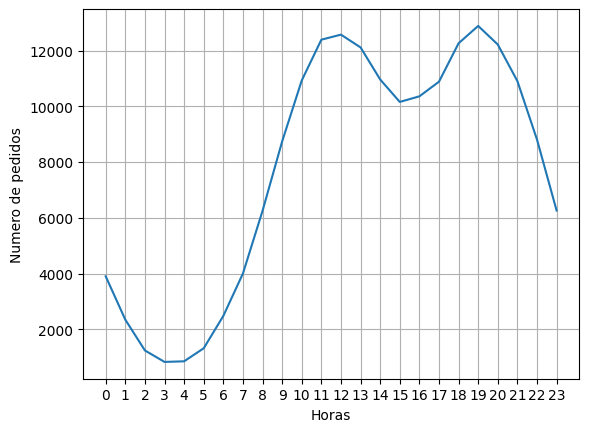

In [ ]:
keys = [pair[0] for pair, df in df.groupby(['Hour'])]

plt.plot(keys, df.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.xlabel('Horas')
plt.ylabel('Numero de pedidos')
plt.grid()
plt.show()

Segun mi observación del grafico parece ser que el mejor horario para publicitar los productos es entre las (10-11)hs antes del mediodia y por la tarde de 18hs a 19hs.

# Que productos se venden mejor juntos

Se crea una columna para ver los pedidos agrupados

In [ ]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

# Fuente: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby

La función de 'combinations' se utiliza para generar todos los pares posibles de artículos de una lista determinada. Acá queremos encontrar todos los pares de productos que se compraron juntos dentro del mismo pedido, sin tener en cuenta el orden en el que aparecen. La función 'counter' se utilizará para contar cuántas veces aparece cada par de productos.

In [ ]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

# Fuente:https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary

('iPhone', 'Lightning Charging Cable') 1002
('Google Phone', 'USB-C Charging Cable') 985
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 413
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 159
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


# El producto más vendido y por qué

<ipython-input-18-4b7ec64e3e83>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_counts.index, y=product_counts.values, palette="viridis")


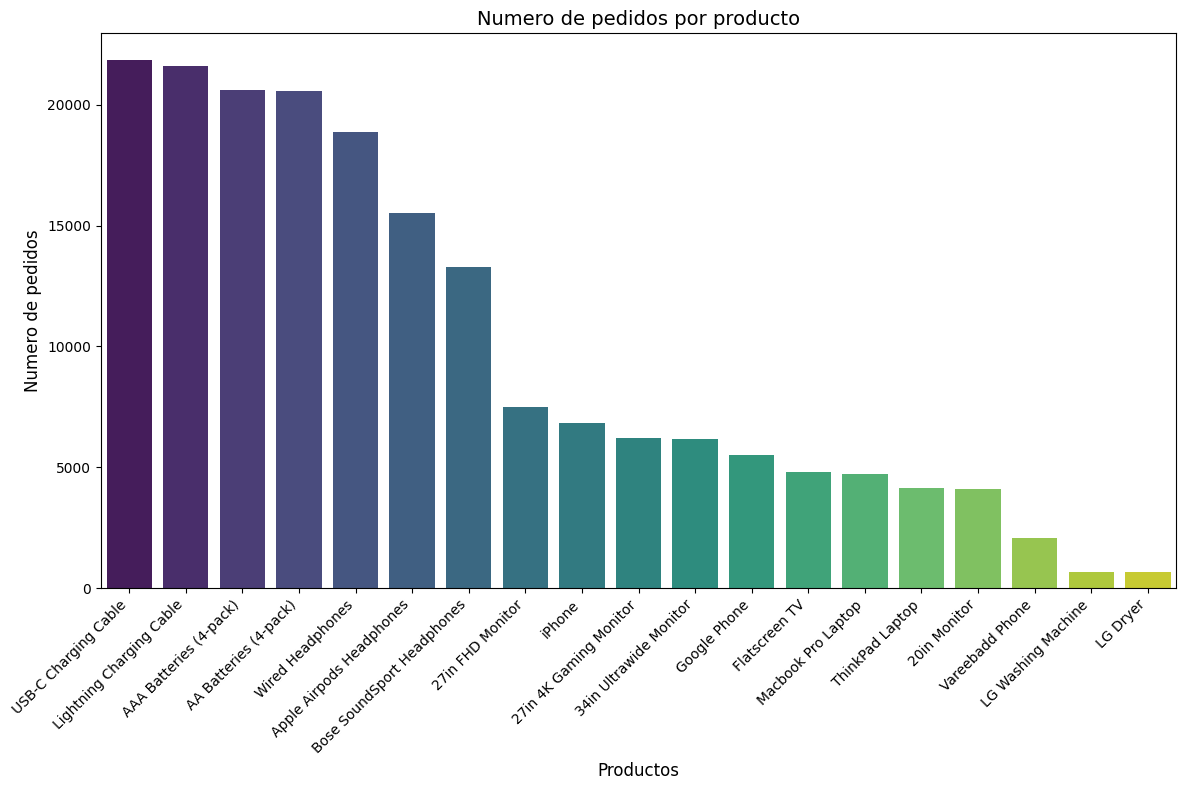

In [ ]:
# Ocurrencias de cada producto
product_counts = df['Product'].value_counts().sort_values(ascending=False)

# Grafico
plt.figure(figsize=(12, 8))

sns.barplot(x=product_counts.index, y=product_counts.values, palette="viridis")

plt.xlabel('Productos', fontsize=12)
plt.ylabel('Numero de pedidos', fontsize=12)
plt.title('Numero de pedidos por producto', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

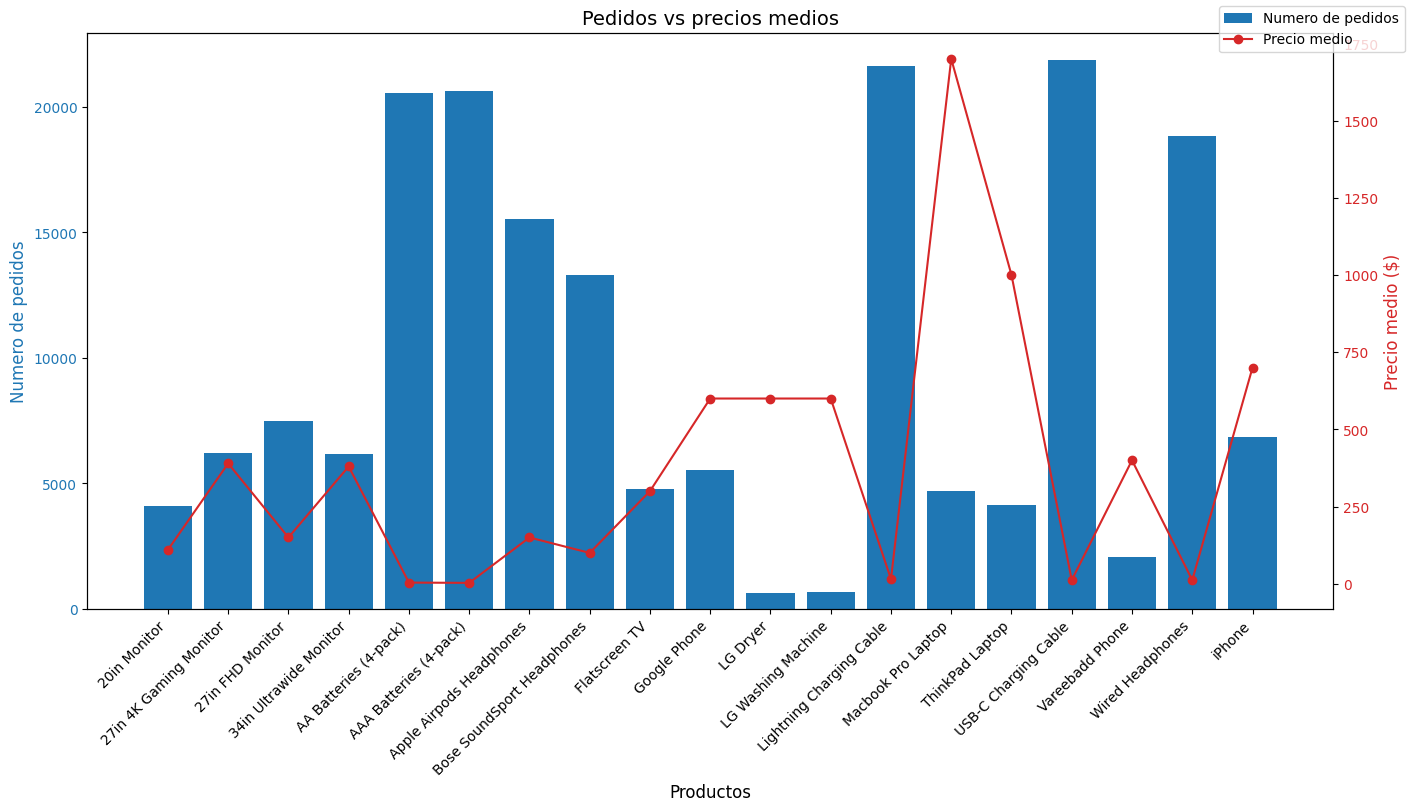

In [ ]:
# Se usa el valor medio para cada producto ya que varia en los meses
product_prices = df.groupby('Product')['Price Each'].mean()
# Se obtiene el num de pedidos
product_counts = df['Product'].value_counts().sort_index()

# Grafica de barras
fig, ax1 = plt.subplots(figsize=(14, 8))


ax1.set_xlabel('Productos', fontsize = 12)
ax1.set_ylabel('Numero de pedidos', color='tab:blue', fontsize=12)
ax1.bar(product_counts.index, product_counts.values, color='tab:blue', label = "Numero de pedidos")
ax1.tick_params(axis='y', labelcolor='tab:blue')
plt.xticks(rotation=45, ha='right', fontsize = 10)

# Se crea un segundo eje que comparta el eje x
ax2 = ax1.twinx()

# Precios en segundo eje
ax2.set_ylabel('Precio medio ($)', color='tab:red', fontsize=12)
ax2.plot(product_prices.index, product_prices.values, color='tab:red', marker='o', label = "Precio medio")
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Pedidos vs precios medios', fontsize = 14)
# Evitar la superposicion de etiquetas
fig.set_layout_engine("constrained")

fig.legend(loc = "upper right")
plt.show()

Los productos se muestran en correlación con el rango de precios, podemos ver que hay una relacion con el número de pedidos y el valor de los productos evidente, se cumple que los productos de menor precio en general tienen muchas mas ventas y los de mayor precio disminuyen significativamente en relación a su tipo y caracteristicas.

In [ ]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99


# Análisis ML: Random Forest

En primera instancia, la idea original fue implementar algun método de ML que me indique segun la fecha (mes, día de la semana  y hora) cuan probable es la venta de estos productos y una vez realizado el entrenamiento poder volcarlos a un gráfico. </br>
Para ello elegí el modelo de clasificación llamado "Random Forest" el cual teoricamente es bastante robusto y puede manejar bien variables categóricas como el dia de la semana.

## Primera prueba

<ipython-input-84-f16b1186c40e>:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


Precisión del modelo: 0.11274166621789003


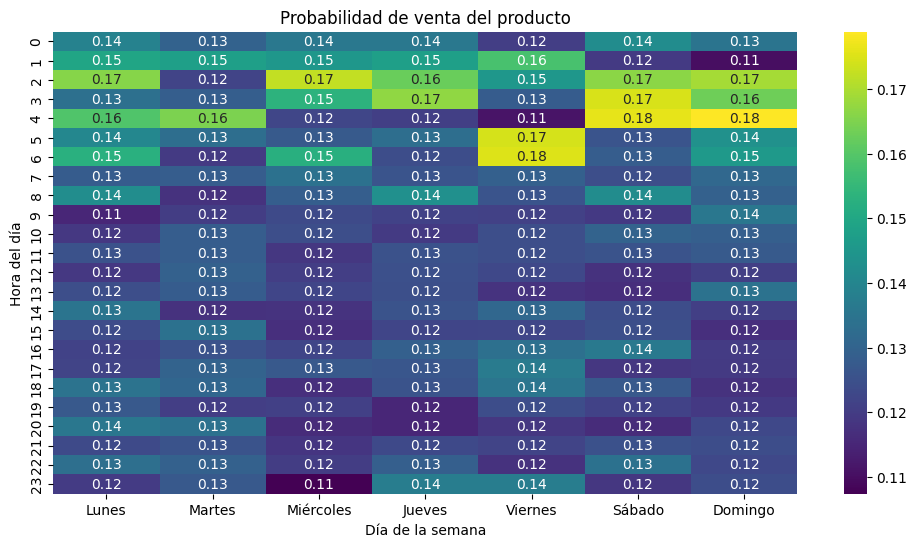

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Preprocesamiento de datos:
# 1. Convertir la fecha en formato datetime
# 2. Extraer día de la semana y hora
# 3. Codificar la variable objetivo (producto)

# Convertir la columna 'Order Date' a datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Hour'] = pd.to_datetime(df['Order Date']).dt.hour
df['Minute'] = pd.to_datetime(df['Order Date']).dt.minute
df['Count'] = 1
df['DayofWeek'] = df['Order Date'].dt.dayofweek  # 0: Lunes, 6: Domingo
# ...

# Crear la columna 'Product_encoded' utilizando LabelEncoder
le = LabelEncoder()
df['Product_encoded'] = le.fit_transform(df['Product']) # Codificar la columna 'Product' y guardarla en 'Product_encoded'

# Definir variables de entrada y salida
X = df[['DayofWeek', 'Hour']]  # Día de la semana y hora
y = df['Product_encoded']  # Producto codificado

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)  # Ajusta los hiperparámetros
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy}")

# Obtener probabilidades de predicción para cada producto
probabilities = model.predict_proba(X_test)

# Crear una matriz con las probabilidades promedio para cada día y hora
days = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
hours = range(24)
prob_matrix = np.zeros((len(hours), len(days)))

for i, hour in enumerate(hours):
    for j, day in enumerate(days):
        # Filtrar datos para la hora y el día específicos
        filtered_data = X_test[(X_test['DayofWeek'] == j) & (X_test['Hour'] == hour)]

        if len(filtered_data) > 0:
            # Calcular la probabilidad promedio para el producto más probable
            avg_prob = np.mean(model.predict_proba(filtered_data), axis=0).max()
            prob_matrix[i, j] = avg_prob

# mapa de calor
plt.figure(figsize=(12, 6))
sns.heatmap(prob_matrix, annot=True, fmt=".2f", cmap="viridis",
            xticklabels=days, yticklabels=hours)
plt.xlabel("Día de la semana")
plt.ylabel("Hora del día")
plt.title("Probabilidad de venta del producto")
plt.show()

</p>Acá se puede observar el modelo implementado donde los colores representan la probabilidad de venta de un producto en una fecha y hora determinada de la semana, sin embargo la precisión del modelo es baja al solo tomar esos parametros de la fecha de compra.<p>

## Segundo análisis: nuevas features

Ahora la idea es implementar más features para mejorar la precisión del modelo como: ciudad, precio y época del año.

In [ ]:
# Preprocesamiento de datos con nuevas features
df['DayofWeek'] = df['Order Date'].dt.dayofweek
df['IsWeekend'] = df['DayofWeek'].apply(lambda x: 1 if x >= 5 else 0)  # Nueva feature: fin de semana
df['City_encoded'] = pd.factorize(df['City'])[0] # Codifica la ciudad
df['Season'] = pd.cut(df['Month'], bins=[0, 3, 6, 9, 12], labels=['Invierno', 'Primavera', 'Verano', 'Otoño'])  # Nueva feature: estación

# Agrupar ciudades antes de dividir en train/test
# Crea una nueva columna 'Region_encoded' con valores numéricos para 'Region'
df['Region'] = df['City'].apply(lambda x: 'Region1' if x in ['Ciudad1', 'Ciudad2'] else 'Region2')
df['Region_encoded'] = pd.factorize(df['Region'])[0]  # Codifica la columna 'Region'

# Definir variables de entrada y salida
X = df[['DayofWeek', 'Hour', 'Price Each', 'City_encoded', 'IsWeekend', 'Region_encoded']]  # Features actualizadas, incluyendo 'Region_encoded'
y = df['Product_encoded']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy}")

# Mostrar métricas detalladas
print(classification_report(y_test, y_pred, target_names=le.classes_))


Precisión del modelo: 0.9779740427594378
                            precision    recall  f1-score   support

              20in Monitor       1.00      0.98      0.99       831
    27in 4K Gaming Monitor       0.90      0.96      0.93      1306
          27in FHD Monitor       0.99      0.98      0.99      1450
    34in Ultrawide Monitor       0.93      0.95      0.94      1223
     AA Batteries (4-pack)       1.00      1.00      1.00      4165
    AAA Batteries (4-pack)       1.00      1.00      1.00      4078
  Apple Airpods Headphones       0.99      1.00      0.99      3106
Bose SoundSport Headphones       1.00      1.00      1.00      2657
             Flatscreen TV       0.98      0.95      0.96       951
              Google Phone       0.78      0.91      0.84      1061
                  LG Dryer       0.17      0.05      0.08       115
        LG Washing Machine       0.10      0.02      0.04       131
  Lightning Charging Cable       1.00      1.00      1.00      4334
      

### Mapa de calor del modelo

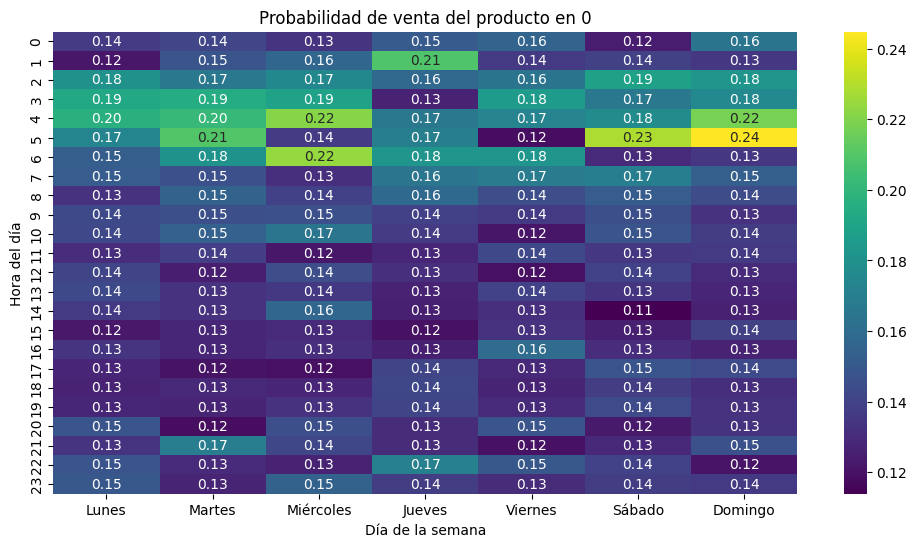

In [ ]:
# Agrupar ciudades
df['Region'] = df['City'].apply(lambda x: 'Region1' if x in ['Ciudad1', 'Ciudad2'] else 'Region2')

# Crear una matriz con las probabilidades promedio para día, hora y región
days = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
hours = range(24)
regions = df['Region_encoded'].unique()
prob_matrix = np.zeros((len(hours), len(days), len(regions)))

for i, hour in enumerate(hours):
    for j, day in enumerate(days):
        for k, region in enumerate(regions):
            # Filtrar datos para la hora, el día y la región específicos
            filtered_data = X_test[(X_test['DayofWeek'] == j) & (X_test['Hour'] == hour) & (X_test['Region_encoded'] == region)]

            if len(filtered_data) > 0:
                # Calcular la probabilidad promedio para el producto más probable
                avg_prob = np.mean(model.predict_proba(filtered_data), axis=0).max()
                prob_matrix[i, j, k] = avg_prob

# Crear el mapa de calor para cada región
for k, region in enumerate(regions):
    plt.figure(figsize=(12, 6))
    sns.heatmap(prob_matrix[:, :, k], annot=True, fmt=".2f", cmap="viridis",
                xticklabels=days, yticklabels=hours)
    plt.xlabel("Día de la semana")
    plt.ylabel("Hora del día")
    plt.title(f"Probabilidad de venta del producto en {region}")
    plt.show()

</p>Como podemos ver ahora el modelo es bastante mas preciso, el mapa de calor es el mismo, utiliza todos los productos como referencia para calcular las probabilidades pero esta vez esta entrenado segun la ciudad y precio de compra además de la fecha.<p>

### Gráfico de barras agrupados:

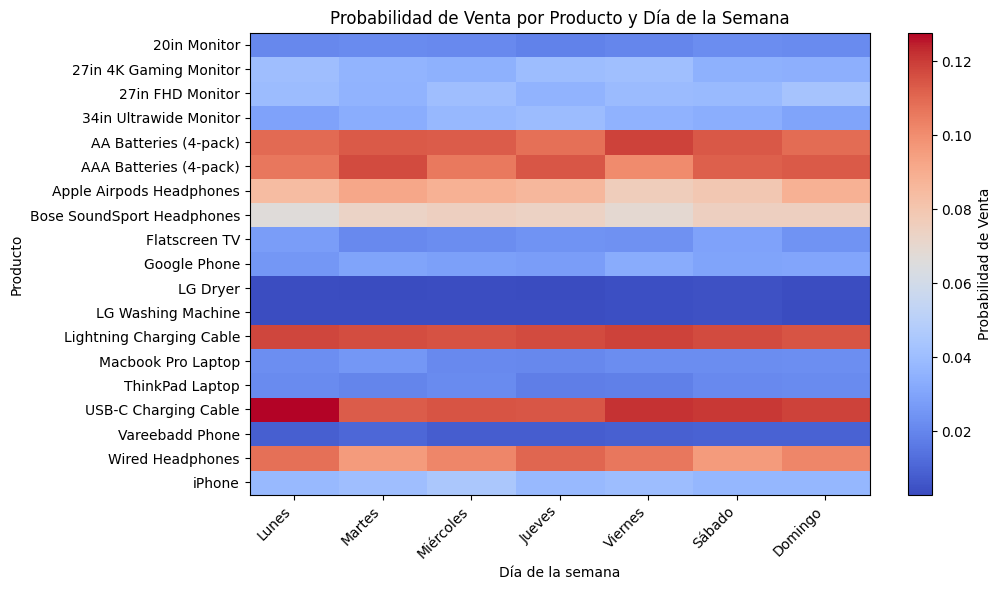

In [ ]:
# Asegurar que los datos están en el formato correcto
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['DayofWeek'] = df['Order Date'].dt.dayofweek
df['IsWeekend'] = df['DayofWeek'].apply(lambda x: 1 if x >= 5 else 0)
df['City_encoded'] = pd.factorize(df['City'])[0]
df['Region_encoded'] = pd.factorize(df['Region'])[0]

# Codificar la variable objetivo
le = LabelEncoder()
df['Product_encoded'] = le.fit_transform(df['Product'])

# Definir X (variables de entrada) y y (producto codificado)
X = df[['DayofWeek', 'Hour', 'Price Each', 'City_encoded', 'IsWeekend', 'Region_encoded']]
y = df['Product_encoded']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Obtener probabilidades de predicción
probs = model.predict_proba(X_test)

# Crear estructura para almacenar probabilidades por producto y día
products = le.classes_
days = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
prob_matrix = np.zeros((len(products), len(days)))

# Calcular probabilidades promedio
for i, product in enumerate(products):
    product_encoded = le.transform([product])[0]  # Obtener el índice codificado del producto
    for j, day in enumerate(days):
        # Filtrar X_test por día de la semana
        mask = X_test['DayofWeek'] == j
        if mask.sum() > 0:
            prob_matrix[i, j] = np.mean(probs[mask, product_encoded])  # Probabilidad promedio del producto en ese día

# Normalizar las probabilidades para evitar valores sesgados
prob_matrix /= prob_matrix.sum(axis=0, keepdims=True)

# Graficar el nuevo mapa de calor con probabilidades corregidas
fig, ax = plt.subplots(figsize=(10, 6))
cax = ax.imshow(prob_matrix, cmap='coolwarm', aspect='auto')

# Etiquetas
ax.set_xticks(np.arange(len(days)))
ax.set_yticks(np.arange(len(products)))
ax.set_xticklabels(days)
ax.set_yticklabels(products)
plt.xticks(rotation=45, ha='right')
plt.colorbar(cax, label="Probabilidad de Venta")

plt.xlabel("Día de la semana")
plt.ylabel("Producto")
plt.title("Probabilidad de Venta por Producto y Día de la Semana")

plt.show()


</p>Este gráfico muestra la probabilidad de venta de cada producto según el día de la semana. Los colores representan la probabilidad relativa de compra, donde los tonos más cálidos indican una mayor probabilidad. Esto sirve para identificar patrones de demanda y optimizar estrategias de inventario y ventas.<p>

### Gráfico de dispersión por colores

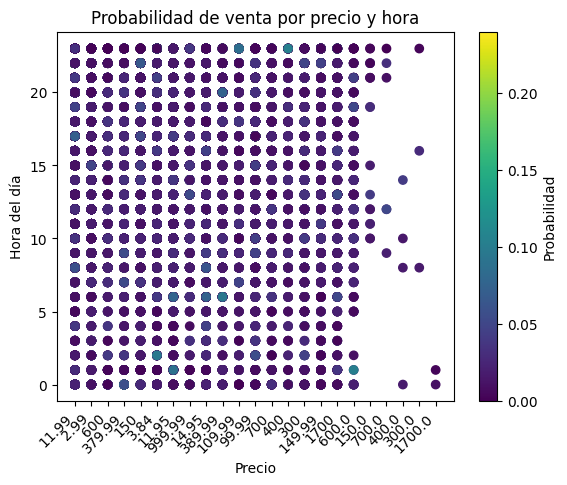

In [ ]:
# Probabilidad de venta por precio y hora

product_to_visualize = products[0]
plt.scatter(X_test['Price Each'], X_test['Hour'], c=probabilities[:, products.tolist().index(product_to_visualize)], cmap='viridis')
plt.xlabel("Precio")
plt.ylabel("Hora del día")
plt.title("Probabilidad de venta por precio y hora")
plt.colorbar(label="Probabilidad")

# Rotando los precios
plt.xticks(rotation=45, ha='right')

plt.show()

</p>Este gráfico es bastante util, se puede visualizar la probabilidad de compra en función de la hora y el precio del producto en donde los tonos mas claros representan una mayor probabilidad. Esto permite identificar patrones de demanda para ajustar estrategias de precios y disponibilidad horaria para optimizar las ventas.<p>

# Análisis ML: Regresión Logística (clasificación múltiple)

&nbsp;A modo de estudio y por curiosidad también seleccione el método de regresión logística para trabajar con este dataset principalmente porque es fácil de interpretar y quería observar que tan preciso resultaba en este caso.</br>
&nbsp;Este modelo es simple de entender e implementar, no requiere demasiado poder computacional, es poco sensible a outliers y tambien permite medir la incertidumbre de las predicciones lo que permite tomar decisiones basándose en el riesgo.</br>
&nbsp;Para este caso en particular voy a estar analizando que producto tiene mayor probabilidad de compra en base a la cantidad ordenada, la ubicacion, la fecha y el valor.

## Cargar y preprocesar los datos:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression


# Convertir la fecha en formato datetime
df["Order Date"] = pd.to_datetime(df["Order Date"], errors="coerce")

# Extraer características de la fecha
df["Month"] = df["Order Date"].dt.month
df["Day"] = df["Order Date"].dt.day
df["Hour"] = df["Order Date"].dt.hour

# Convertir la ciudad en variables dummies
df = pd.get_dummies(df, columns=["City"], drop_first=True)

# Seleccionar variables de entrada
X = df[["Quantity Ordered", "Month", "Day", "Hour", "Price Each"] + list(df.filter(like="City_"))]

# Codificar la variable objetivo
le = LabelEncoder()
df["Product_encoded"] = le.fit_transform(df["Product"])  # Crear una nueva columna con los valores codificados
y = df["Product_encoded"]  # Ahora 'y' es numérica y lista para el modelo

# Dividir el dataset en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir y entrenar el modelo
model = LogisticRegression(max_iter=200)  # Asegurar que el modelo tenga suficiente iteración
model.fit(X_train, y_train)  # Entrenar el modelo con los datos de entrenamiento

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar precisión
print("Precisión del modelo:", accuracy_score(y_test, y_pred))

# Mostrar métricas detalladas
print(classification_report(y_test, y_pred, target_names=le.classes_))


Precisión del modelo: 0.5105821530507836
                            precision    recall  f1-score   support

              20in Monitor       0.00      0.00      0.00       831
    27in 4K Gaming Monitor       0.27      0.27      0.27      1306
          27in FHD Monitor       0.32      0.02      0.04      1450
    34in Ultrawide Monitor       0.26      0.25      0.26      1223
     AA Batteries (4-pack)       0.65      0.86      0.74      4165
    AAA Batteries (4-pack)       0.82      0.55      0.66      4078
  Apple Airpods Headphones       0.49      0.77      0.60      3106
Bose SoundSport Headphones       0.61      0.72      0.66      2657
             Flatscreen TV       0.22      0.27      0.24       951
              Google Phone       0.22      0.01      0.02      1061
                  LG Dryer       0.00      0.00      0.00       115
        LG Washing Machine       0.00      0.00      0.00       131
  Lightning Charging Cable       0.50      0.77      0.60      4334
      

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

</p>La baja precisión del modelo (51.06%) se debe a varios factores. En primer lugar, la alta cantidad de clases (productos) genera un problema de clasificación más complejo, donde algunos productos tienen características similares, lo que lleva a confusiones frecuentes.<br>
También es posible que las características utilizadas (precio, cantidad, hora y ciudad) no sean suficientes para distinguir claramente todos los productos, lo que indica la necesidad de agregar más variables o probar otros modelos más avanzados.<p>

## Matríz de confusión

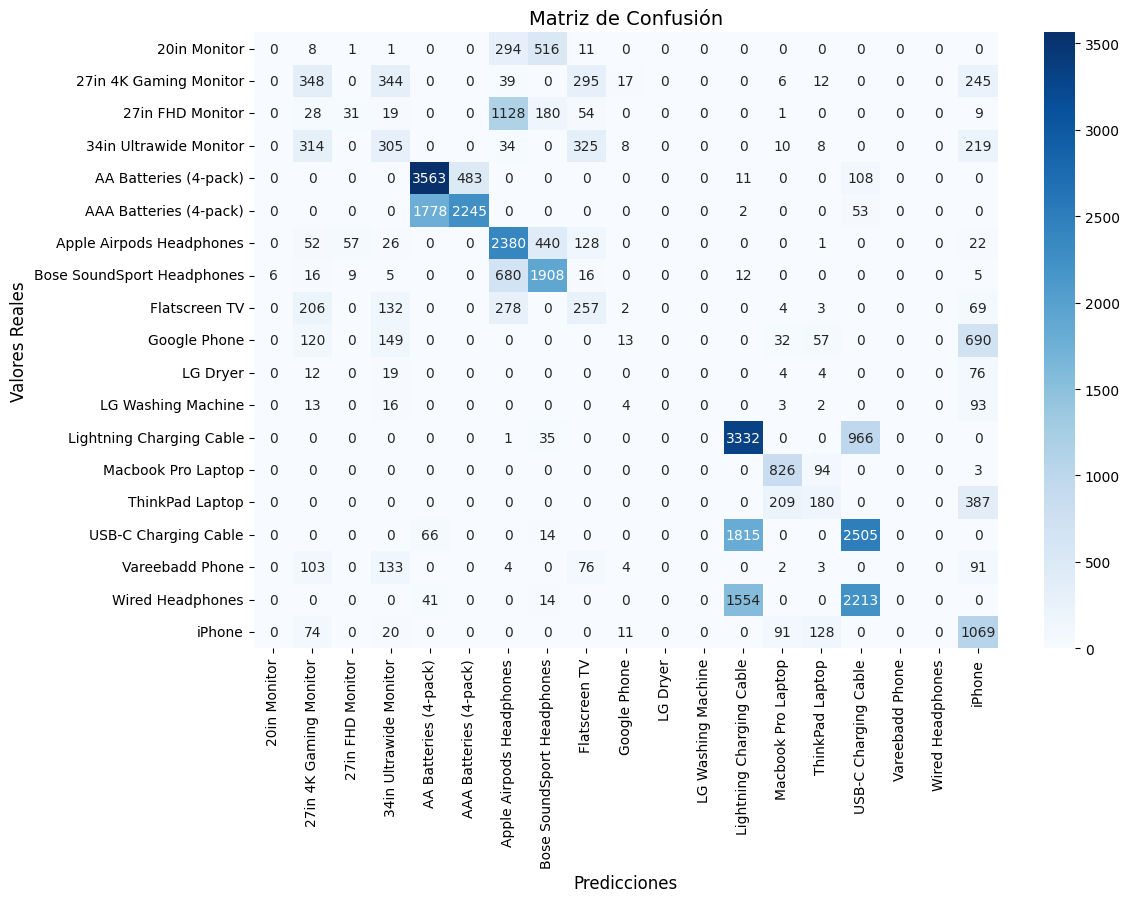

In [ ]:

from sklearn.metrics import confusion_matrix

# Generar matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear el gráfico
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)

# Etiquetas y título
plt.xlabel("Predicciones", fontsize=12)
plt.ylabel("Valores Reales", fontsize=12)
plt.title("Matriz de Confusión", fontsize=14)
plt.xticks(rotation=90)  # Rotar nombres de las clases para mejor visibilidad
plt.yticks(rotation=0)

# Mostrar gráfico
plt.show()


</p>Esta matriz de confusión muestra el desempeño del modelo de regresión logística en la clasificación de productos. Cada fila representa las categorías reales de productos vendidos, mientras que cada columna indica las predicciones del modelo. Los valores en la diagonal principal reflejan las predicciones correctas, mientras que los valores fuera de la diagonal indican errores de clasificación. Este análisis permite identificar qué productos son más propensos a confundirse entre sí y evaluar la precisión general del modelo.

# Conclusión

El análisis comparativo entre los dos modelos demuestra que la elección del algoritmo tiene un impacto crucial en la capacidad predictiva del sistema. La regresión logística, a pesar de su simplicidad y facilidad interpretativa, presentó un rendimiento limitado (51% de precisión) en la clasificación de productos, evidenciando su dificultad para capturar relaciones complejas en un dataset de ventas con múltiples categorías y patrones solapados.
</br>Por otro lado, el modelo de Random Forest mostró una notable mejora, alcanzando casi un 98% de precisión. Ya que es capaz de modelar interacciones no lineales y aprovechar de manera más efectiva las diversas características del dataset, aunque aún presenta debilidades en productos con baja frecuencia de ventas.
<br> La elección del modelo debe equilibrar la interpretabilidad y la precisión, y en este caso, Random Forest es mas útil para optimizar la planificación de inventarios, predecir la necesidad de reabastecimiento y reducir las pérdidas por productos obsoletos y estrategias comerciales como campañas de marketing en base a la información de la venta de productos según la fecha y hora o paquetes promocionales con los productos más vendidos en conjunto, mientras que la regresión logística puede servir de referencia o punto de partida en estudios comparativos.
<br>
Para futuras investigaciones se sugiere explorar la incorporación de variables externas como datos climáticos o eventos especiales (Navidad, Año Nuevo, Día de Reyes, San Valentín, Día de la Madre, feriados nacionales, Black Friday, etc), y explorar la aplicación de 'deep learning' para aumentar la precisión.